In [2]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/complaints.csv')


<ipython-input-4-5c7ca1ac1ffb>:1: DtypeWarning: Columns (5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/My Drive/complaints.csv')


Explanatory Data Analysis

In [24]:
print(data.head())

      Date received  Product                            Sub-product  \
32577    2015-04-13        0  Other (i.e. phone, health club, etc.)   
37606    2016-12-16        0  Other (i.e. phone, health club, etc.)   
38017    2015-04-04        0                            Credit card   
38172    2017-03-24        0                            Credit card   
38434    2016-05-30        0                                Medical   

                                       Issue                  Sub-issue  \
32577                  Communication tactics  Called outside of 8am-9pm   
37606  Cont'd attempts collect debt not owed           Debt is not mine   
38017  Cont'd attempts collect debt not owed              Debt was paid   
38172  Cont'd attempts collect debt not owed           Debt is not mine   
38434  Cont'd attempts collect debt not owed              Debt was paid   

                            Consumer complaint narrative  \
32577  I got my XXXX call around XXXX XXXX. I was up ...   
37

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4528267 entries, 0 to 4528266
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 621.

In [7]:
print(data.describe())

       Complaint ID
count  4.528267e+06
mean   4.679673e+06
std    2.194445e+06
min    1.000000e+00
25%    3.027310e+06
50%    4.713977e+06
75%    6.632294e+06
max    8.143900e+06


In [8]:
print(data.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235291
Issue                                 0
Sub-issue                        724952
Consumer complaint narrative    2887355
Company public response         2384053
Company                               0
State                             43962
ZIP code                          30223
Tags                            4076120
Consumer consent provided?       918032
Submitted via                         0
Date sent to company                  0
Company response to consumer         10
Timely response?                      0
Consumer disputed?              3759912
Complaint ID                          0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
print(data.isnull().sum())

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


In [11]:
print(data['Product'].value_counts())


Debt collection    2983
Student loan        137
Name: Product, dtype: int64


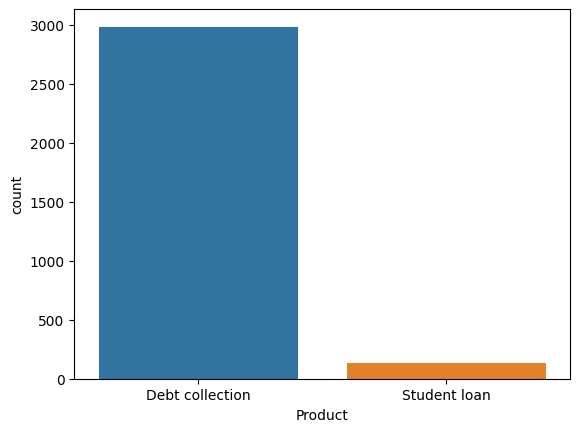

In [12]:
sns.countplot(x='Product', data=data)
plt.show()



In [13]:
data['Consumer complaint narrative'].fillna('', inplace=True)


In [14]:
data['Text_Length'] = data['Consumer complaint narrative'].apply(len)


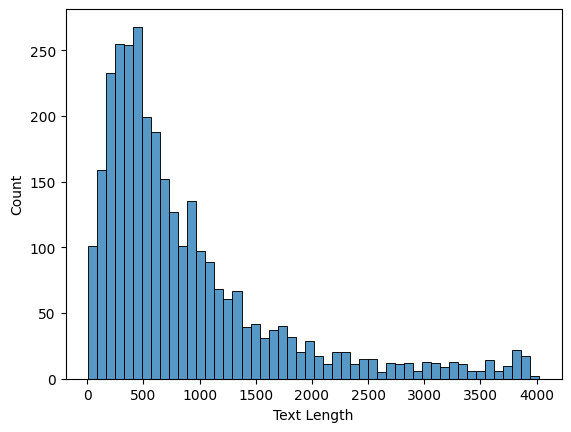

In [15]:
sns.histplot(data['Text_Length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [16]:
label_encoder = LabelEncoder()
data['Product'] = label_encoder.fit_transform(data['Product'])

Data Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['Consumer complaint narrative'], data['Product'], test_size=0.2, random_state=42)


TF-IDF Vectorization

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


SMOTE (For Data Balance)

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)


Naive Bayes Model

In [41]:
model = MultinomialNB()


model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test_tfidf)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9551282051282052


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       588
           1       0.58      0.81      0.67        36

    accuracy                           0.96       624
   macro avg       0.78      0.88      0.83       624
weighted avg       0.96      0.96      0.96       624



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Logistic Regression Model

In [44]:
model = LogisticRegression()


model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test_tfidf)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9743589743589743


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       588
           1       0.79      0.75      0.77        36

    accuracy                           0.97       624
   macro avg       0.89      0.87      0.88       624
weighted avg       0.97      0.97      0.97       624



Random Forest Model

In [47]:
model = RandomForestClassifier()


model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test_tfidf)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9519230769230769


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       588
           1       1.00      0.17      0.29        36

    accuracy                           0.95       624
   macro avg       0.98      0.58      0.63       624
weighted avg       0.95      0.95      0.94       624



Support Vector Machine Model

In [50]:
model = SVC()


model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test_tfidf)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9615384615384616


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       588
           1       0.88      0.39      0.54        36

    accuracy                           0.96       624
   macro avg       0.92      0.69      0.76       624
weighted avg       0.96      0.96      0.95       624



Prediction

In [53]:

new_complaint = ["This company charged me incorrect fees and provided poor service."]

new_complaint_tfidf = tfidf_vectorizer.transform(new_complaint)

predicted_category = model.predict(new_complaint_tfidf)

predicted_category_label = label_encoder.inverse_transform(predicted_category)

print(f"Predicted Category: {predicted_category_label}")


Predicted Category: ['Debt collection']
